In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.layers import*
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist



In [2]:
pip show keras

Name: keras
Version: 3.5.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [3]:
pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


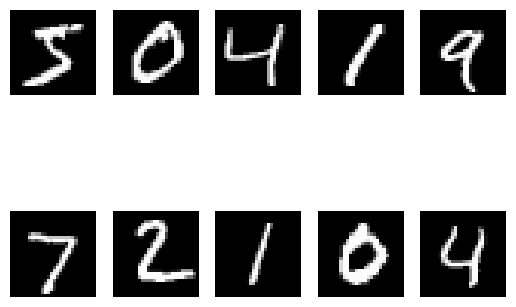

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Visualization of train and test images
#plot 5 images as gray scale from train and test datasets
plt.subplot(2,5,1)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,5,2)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,5,3)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,5,4)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,5,5)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,5,6)
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,5,7)
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,5,8)
plt.imshow(X_test[2], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,5,9)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,5,10)
plt.imshow(X_test[4], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [14]:
## printing 10 th x-training sample
print(X_train[10,:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
## printing 10th y_train
print(y_train[10])

3


In [15]:
#set numeric type to float32 from uint8#Set numeric type to float32 from uint8

#It reduce memory requirements by forcing the precision of the pixel values to be 32 bit

trainX = X_train.astype('float32')

testX = X_test.astype('float32')

#Normalize value to [0, 1]

trainX /= 255

testX /= 255

#Transform lables to one-hot encoding-Convert 1-dimensional class arrays
#to 10-dimensional class matrices

## one-hot encode the labels we have 10 output classes

#So '0' [1 0 0 0 0 0 0 0 0 0]; '1' [0 1 0 0 0 0 0 0 0 0],
#'2'> [0 0 1 0 0 0 0 0 0 0] & so on

y_train = tf.keras.utils.to_categorical (y_train, 10)

y_test = tf.keras.utils.to_categorical(y_test, 10)

print(y_train.shape)

print(y_test.shape)

print("One-hot encoded target training dataset")

print(y_train[0:5,])

print("One-hot encoded target test dataset")
print(y_test[0:5,])

(60000, 10)
(10000, 10)
One-hot encoded target training dataset
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
One-hot encoded target test dataset
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [10]:
print(trainX[10,:])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
print("Before reshape x_train and x_test dataset : ")
print(trainX.shape, testX.shape)
# reshape the train and test dataset into 4D
x_train = trainX.reshape(trainX.shape[0], 28, 28, 1)
x_test = testX.reshape(testX.shape[0], 28, 28, 1)
print("After reshape x_train and x_test dataset : ")
print(x_train.shape, x_test.shape)

Before reshape x_train and x_test dataset : 
(60000, 28, 28) (10000, 28, 28)
After reshape x_train and x_test dataset : 
(60000, 28, 28, 1) (10000, 28, 28, 1)


# LeNet-5 CNN model

In [17]:
#defining CNN LeNet 5 model
# part 1 feature extraction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()
# convulational layer
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='valid'))
model
# pooling layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# convolution layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# pooling layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# fully connected layer
model.add(Conv2D(120, kernel_size=(1, 1), strides=(1, 1), activation='tanh', padding='valid'))

#part 2 Classification
#flatten
model.add(Flatten())
# fully connected layer
model.add(Dense(84, activation='tanh'))
# output layer
model.add(Dense(10, activation='softmax'))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 120)           │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │         161,364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,826 (651.66 KB)

 Trainable params: 166,826 (651.66 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#fitting the model
hist= model.fit(x=x_train,y=y_train, batch_size=64, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8711 - loss: 0.4452 - val_accuracy: 0.9614 - val_loss: 0.1368
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9646 - loss: 0.1221 - val_accuracy: 0.9771 - val_loss: 0.0715
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9774 - loss: 0.0731 - val_accuracy: 0.9840 - val_loss: 0.0531
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9832 - loss: 0.0565 - val_accuracy: 0.9828 - val_loss: 0.0531
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9860 - loss: 0.0455 - val_accuracy: 0.9856 - val_loss: 0.0460
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9890 - loss: 0.0363 - val_accuracy: 0.9848 - val_loss: 0.0464
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9899 - loss: 0.0320 - val_accuracy: 0.9829 - val_loss: 0.0530
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0

In [19]:
## loading the saved weight to the model from Mnist dataset
## Local Workstation


## Colab: Google Drive
model.save("my_model.keras")





In [20]:
def preprocess_image(image_path):
    # Load the image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(28, 28),color_mode='grayscale')
    #Convert the image to numpy array
    image = tf.keras.preprocessing.image.img_to_array(image)
    image=image.astype('float32')/255.0
    # Convert the image to a numpy array
    image = np.expand_dims(image, axis=0)
    #image = np.expand_dims(image, axis=3)
    shape = image.shape
    print(shape)


   # image = np.repeat(image, axis=-1)
    #reshape = image.reshape(1, 28, 28)
    #return reshape
    #expand = np.expand_dims(image, axis=0)
    #return expand
    #re_expand = np.repeat(expand, repeats=3, axis=-1)
    #return re_expand





    return image

In [21]:
image_path = '/content/3.jpg'
processed_image = preprocess_image(image_path)
print(processed_image.shape)
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)
print(f"Predicted class: {predicted_class}")

#confidence = np.max(prediction)
#print(f"Confidence: {confidence}")

(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
Predicted class: 8


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Text(0, 0.5, 'Loss')

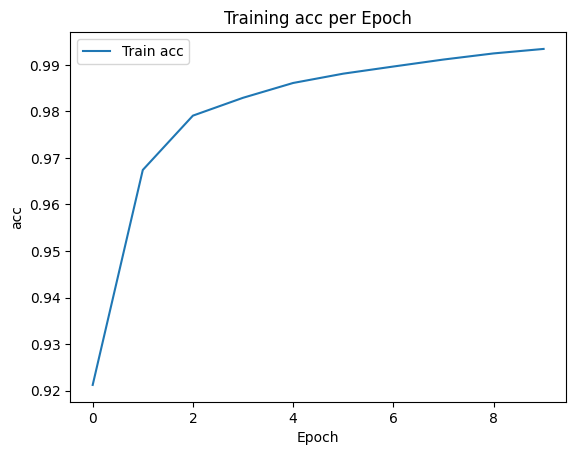

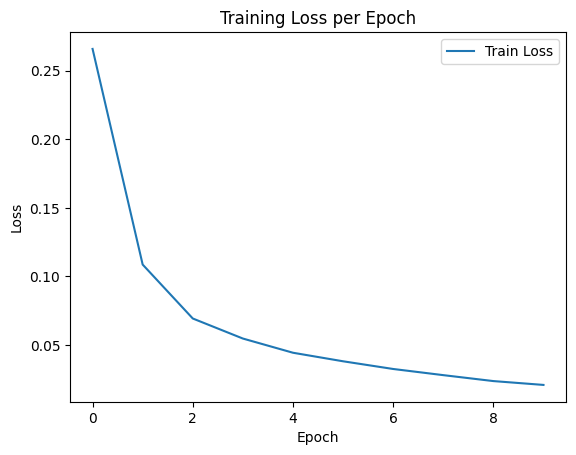

In [22]:
# Plot the model accuracy on training data
print(hist.history.keys())

import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(hist.history['accuracy'])
ax.legend(['Train acc'])
ax.set_title('Training acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

#Plot the model loss on training data
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(hist.history['loss'])
ax.legend(['Train Loss'])
ax.set_title('Training Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

**AlexNet CNN model**

In [17]:

#define AlexNet model
def AlexNetmodel():
  input = tf.keras.layers.Input(shape=(28,28,1))
  #feature extraction part
  conv1 = tf.keras.layers.Conv2D(96, kernel_size=(11,11),  activation='relu', padding="same",kernel_initializer ="he_normal")(input)
  pool1 = tf.keras.layers.MaxPooling2D((2,2),(2,2))(conv1)
  conv2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding="same",kernel_initializer ="he_normal")(pool1)
  pool2 = tf.keras.layers.MaxPooling2D((2,2),(2,2))(conv2)
  conv3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),  activation='relu', padding="same",kernel_initializer ="he_normal")(pool2)
  conv4 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding="same",kernel_initializer ="he_normal")(conv3)
  conv5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding="same",kernel_initializer ="he_normal")(conv4)
  pool3 = tf.keras.layers.MaxPooling2D((2,2),(2,2))(conv5)

  # flattening layer
  flat_layer = tf.keras.layers.Flatten()(pool3)
  #flat_layer = tf.keras.layers.GlobalAveragePooling2D()(pool3) #This line is causing an error because the output of pool3 is not 4D

  #classifier part
  dense1 = tf.keras.layers.Dense(units=1024, activation='relu')(flat_layer)
  dense2 = tf.keras.layers.Dense(units=512, activation='relu')(dense1)
  output = tf.keras.layers.Dense(units=10, activation='softmax')(dense2)
  model = tf.keras.models.Model(inputs=input, outputs=output)
  return model

## calling AlexNet fn
model_alex = AlexNetmodel()
model_alex.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,488,010 (17.12 MB)

 Trainable params: 4,488,010 (17.12 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#Local Workstation
model.save("my_model.keras")

# Colab: Google Drive
model_alex.save("my_model_alex.keras")


#Loading the saved weight to the model from Local Workstation


#Loading the saved weight to the model from Colab
model.load_weights("my_model.keras")

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 120)           │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 84)                  │         161,364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,826 (651.66 KB)

 Trainable params: 166,826 (651.66 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the model
model_alex.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Fitting the model
hist = model_alex.fit(x=x_train,y=y_train, epochs=10, batch_size=128, verbose=1)
#hist = model_alex.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1046s 2s/step - accuracy: 0.7547 - loss: 0.7989
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1081s 2s/step - accuracy: 0.9622 - loss: 0.1250
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1042s 2s/step - accuracy: 0.9773 - loss: 0.0768
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1042s 2s/step - accuracy: 0.9828 - loss: 0.0582
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1042s 2s/step - accuracy: 0.9858 - loss: 0.0467
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1043s 2s/step - accuracy: 0.9880 - loss: 0.0404
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1047s 2s/step - accuracy: 0.9901 - loss: 0.0331
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1027s 2s/step - accuracy: 0.9927 - loss: 0.0265
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1049s 2s/step - accuracy: 0.9932 - loss: 0.0236
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1035s 2s/step - accuracy: 0.9931 - loss: 0.0227


In [20]:
model.load_weights("my_model.keras")

dict_keys(['accuracy', 'loss'])


Text(0, 0.5, 'Loss')

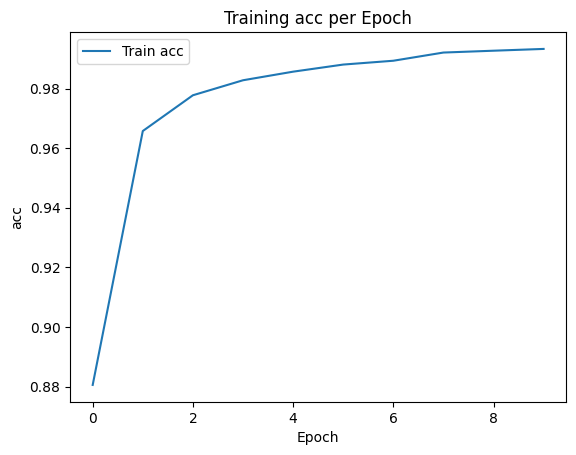

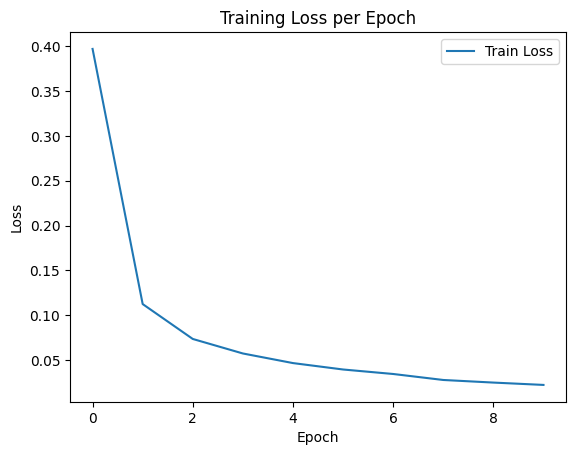

In [21]:
# Plot the model accuracy on training data
print(hist.history.keys())

import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(hist.history['accuracy'])
ax.legend(['Train acc'])
ax.set_title('Training acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

#Plot the model loss on training data
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(hist.history['loss'])
ax.legend(['Train Loss'])
ax.set_title('Training Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

**step 6 Model evaluation**

In [23]:
score = model.evaluate(x_test,y_test)
print('Test loss:',score[0])
print('Test accuracy: ',score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9830 - loss: 0.0541
Test loss: 0.046439845114946365
Test accuracy:  0.9854999780654907


**STEP 7 Model prediction**

In [24]:
#Test digit classes
y_test_class = np.argmax(y_test,axis=1)
print("Test_class")
print(y_test_class[:100])

#Predicted digit classes
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred,axis=1)
print("Predicted_class")
print(y_pred_class[:100])

Test_class
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted_class
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [25]:
print(y_pred[0,:])

[1.4132672e-07 8.4160021e-08 9.6205702e-07 2.4047162e-05 4.0549331e-10
 2.2607640e-08 2.9872034e-12 9.9997389e-01 6.8166692e-08 6.8003044e-07]


In [26]:
#how many mismatches?
(np.argmax(y_pred,axis=1) != np.argmax(y_test,axis=1)).sum()

145

**STEP 8 Performance evaluation**

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print("Performance Metrics: ")
metrics = classification_report(y_test_class, y_pred_class)
print(metrics)
print("Confusion Matrix: ")
CM = confusion_matrix(y_test_class, y_pred_class)
print(CM)

Performance Metrics: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix: 
[[ 975    0    2    0    0    0    1    2    0    0]
 [   0 1133    0    0    0    0    1    1    0    0]
 [   0    3 1024    0    1    0    0    2    2    0]
 [   1    0    9  992    0    2    0    1

**STEP 9 plotting ROC curve**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


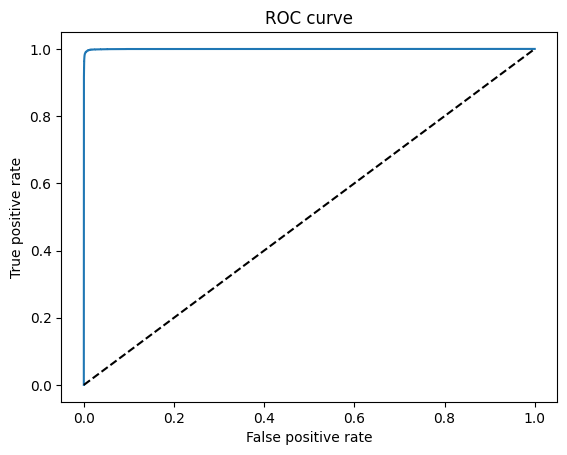

In [28]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred.ravel())
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()